## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Loading the dataset

In [ ]:
df = pd.read_csv("/content/medical_cost_insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Checking for null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

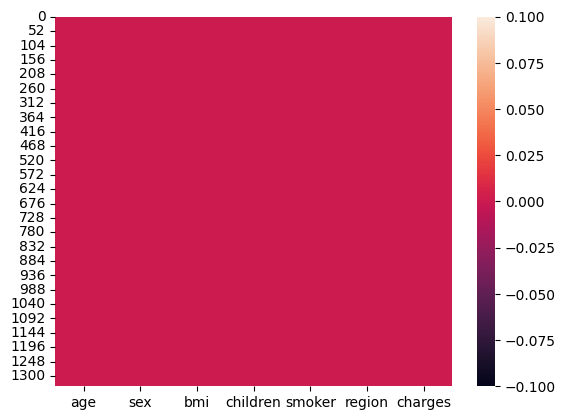

In [ ]:
sns.heatmap(df.isnull())

We need to check for object type columns if whitespaces are present or not cause even if a whitespace is present instead of the data, even then it is considered as a valid string.

In [ ]:
whitespace_rows = df['sex'].str.contains(r'\s')
df[whitespace_rows]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
whitespace_rows = df['smoker'].str.contains(r'\s')
df[whitespace_rows]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
whitespace_rows = df['region'].str.contains(r'\s')
df[whitespace_rows]

,age,sex,bmi,children,smoker,region,charges


Since we can see that no whitespaces are present in the columns, means we can confirm that the data does not have any null values.

## Converting the labels to categorical data

It is better to create a copy of the dataset.

In [ ]:
df2 = df.copy()

In [ ]:
df2['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df2['sex'] = pd.Categorical(df2['sex']).codes

In [ ]:
df2['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int8

In [ ]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
df2['smoker'] = pd.Categorical(df2['smoker']).codes

In [ ]:
df2['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int8

We might me tempted to use One-hot encoding for the 'region' column. But this column might have some natural order relationship with the 'charges' column. Regions do affect insurance costs. Eg: If you are living in a developed city area your insurance cost will be more than other cities. Hence it is better for now to use Ordinal Encoding.

In [ ]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
df2['region'] = pd.Categorical(df2['region']).codes

In [ ]:
df2['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int8

## Visualizations and Description and Outlier Detection

In [ ]:
df2.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Looking at the given data, if we look for skewness in continuous value columns, there doesn't seem to be any as such. The data is normally distributed.

Univariate Analysis

[]

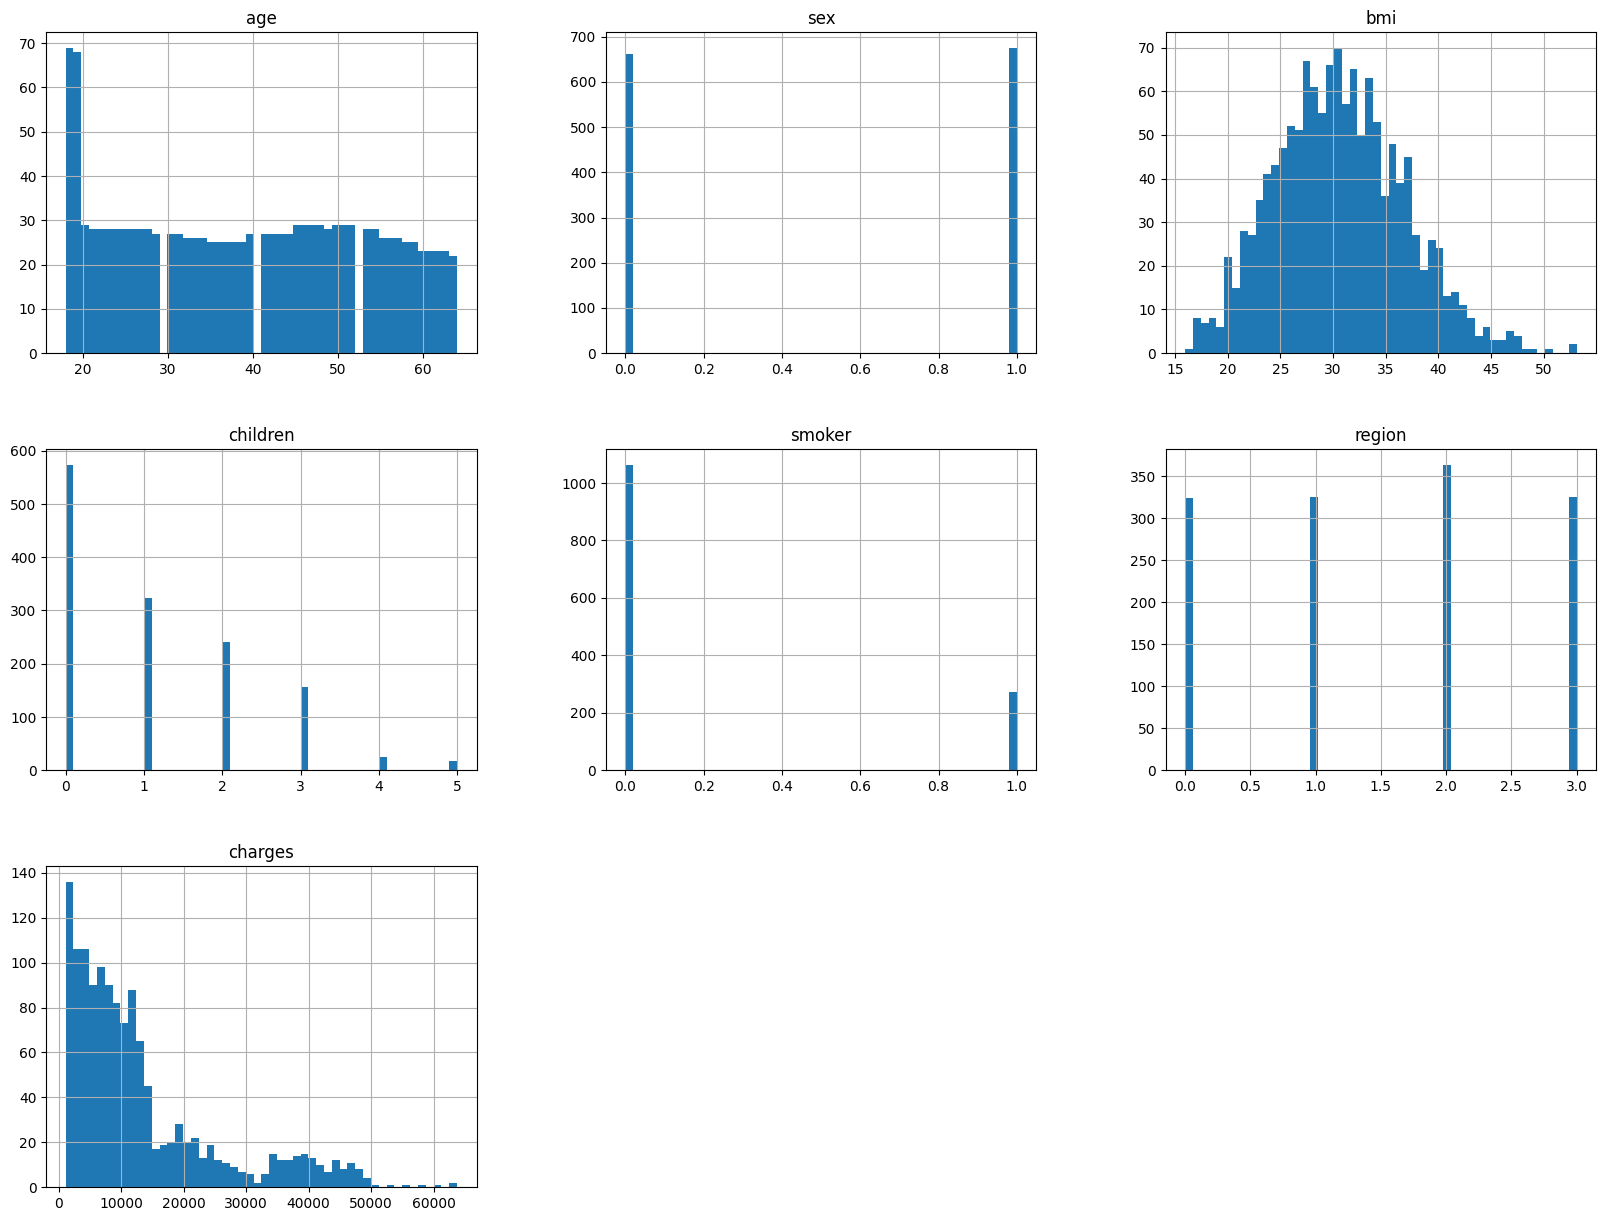

In [ ]:
df2.hist(bins=50, figsize=(20,15))
plt.plot()

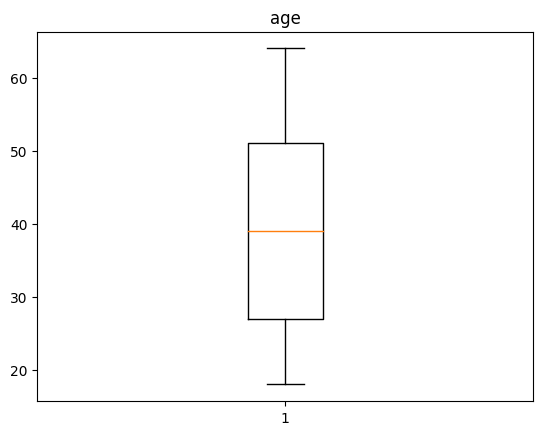

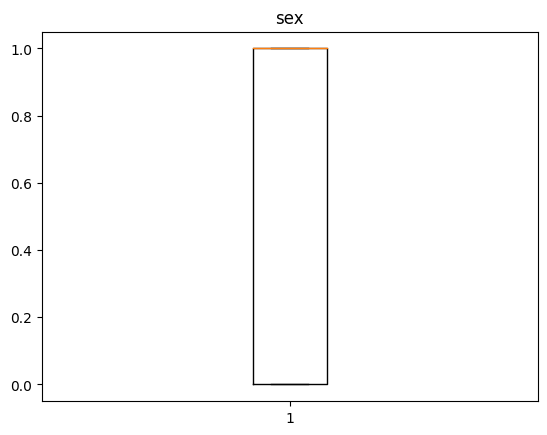

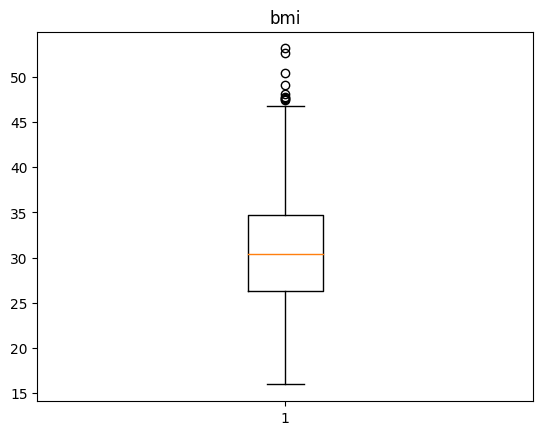

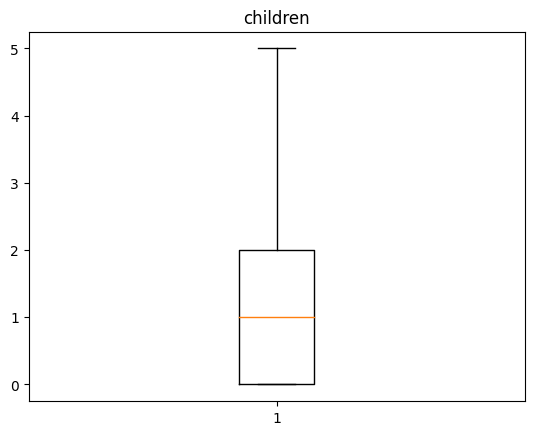

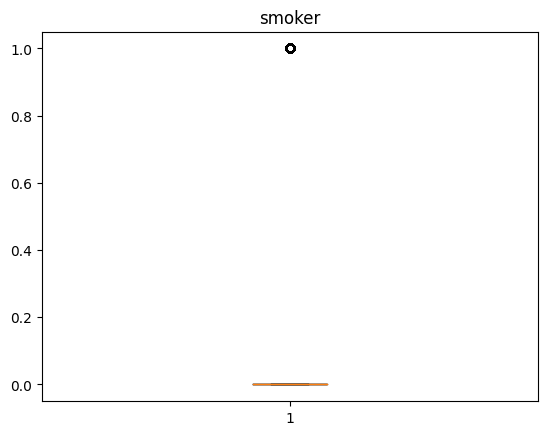

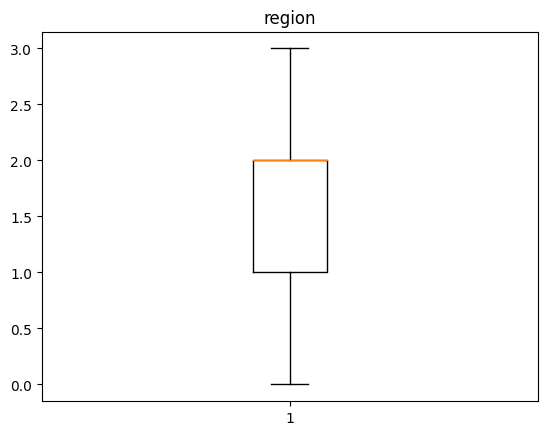

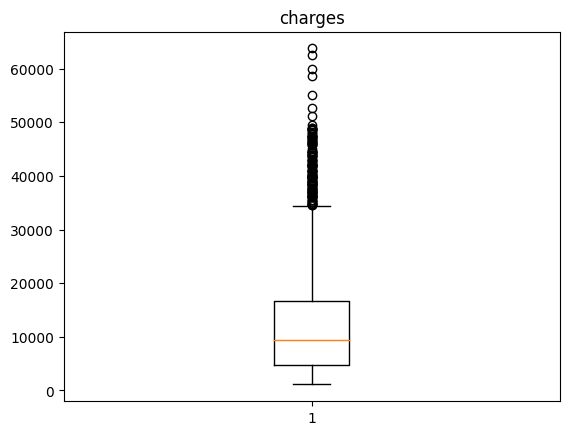

In [ ]:
for i in df2.columns:
  plt.boxplot(df2[i])
  plt.title(i)
  plt.show()

In [ ]:
for i in df2.columns:
  Q1, Q3 = np.percentile(df2[i], [25, 75])
  iqr = Q3 - Q1

  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr

  print(lower_bound, i)
  print(upper_bound, i)

-9.0 age
87.0 age
-1.5 sex
2.5 sex
13.7 bmi
47.290000000000006 bmi
-3.0 children
5.0 children
0.0 smoker
0.0 smoker
-0.5 region
3.5 region
-13109.1508975 charges
34489.350562499996 charges


From this there seems to a few outliers in the bmi column. But for now let us keep them, might be good while generalization.

Bivariate Analysis - Continuous vs Continuous

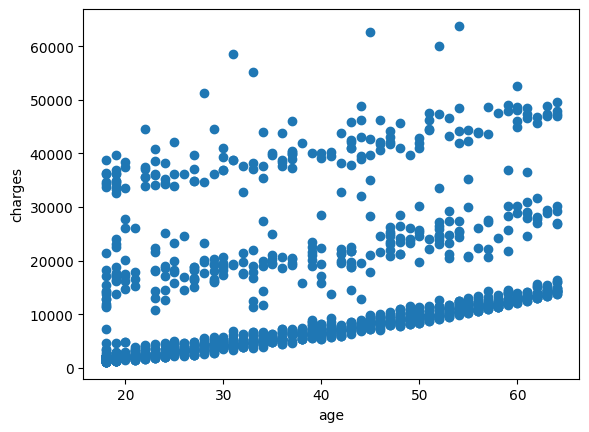

In [ ]:
plt.scatter(df2['age'], df2['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

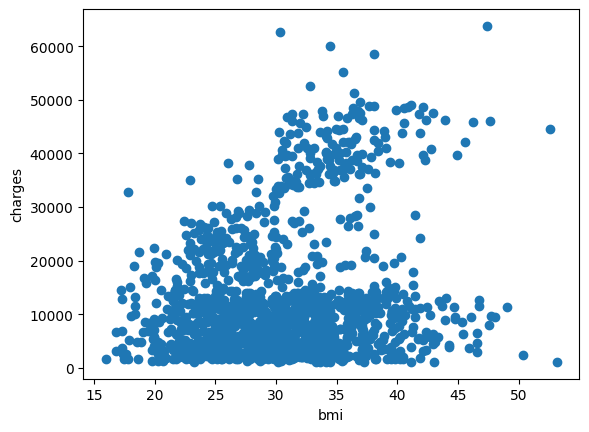

In [ ]:
plt.scatter(df2['bmi'], df2['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

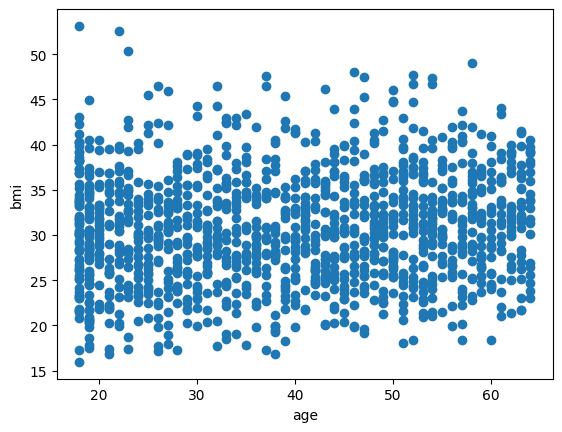

In [ ]:
plt.scatter(df2['age'], df2['bmi'])
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

Bivariate Analysis - Continuous vs Discrete

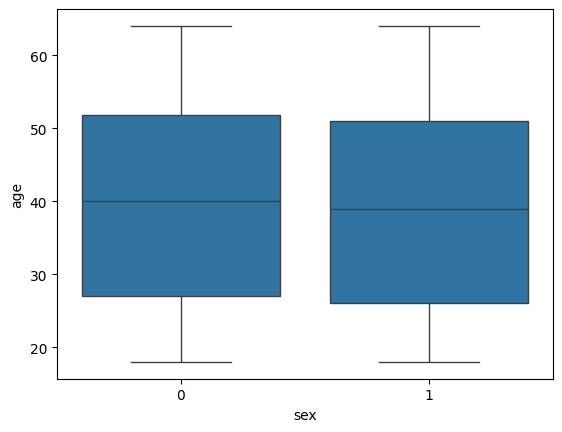

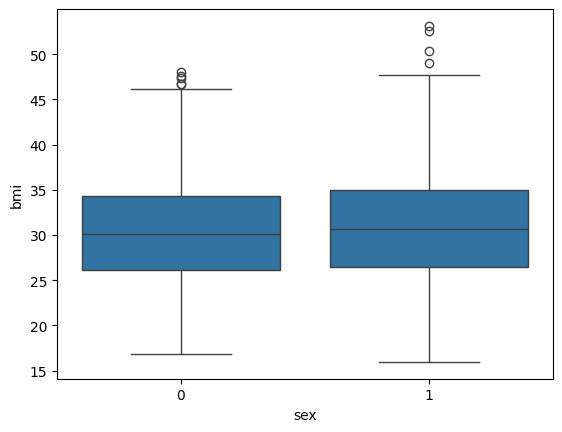

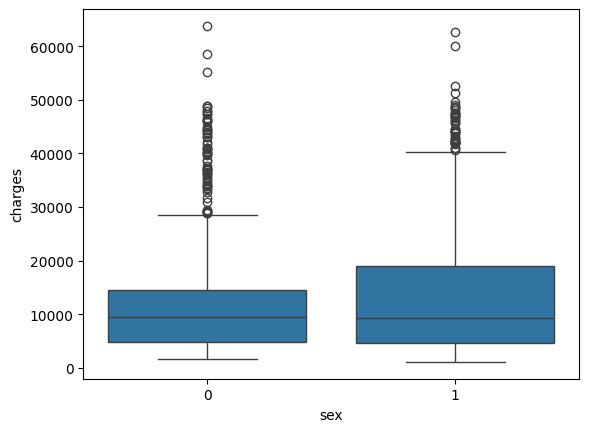

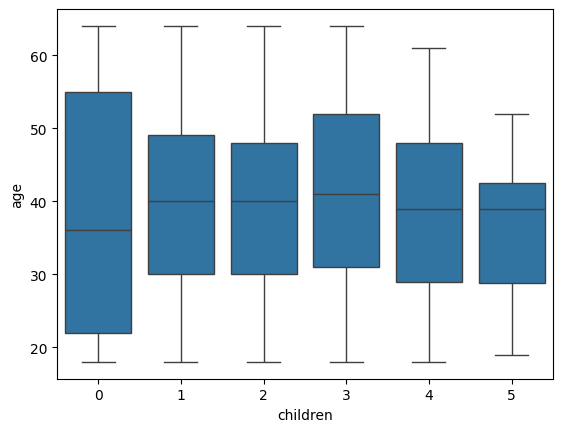

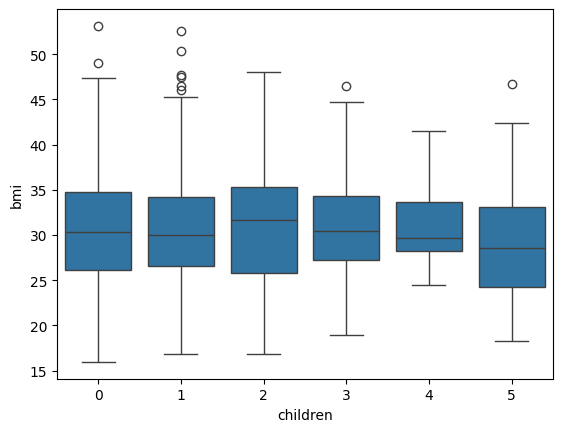

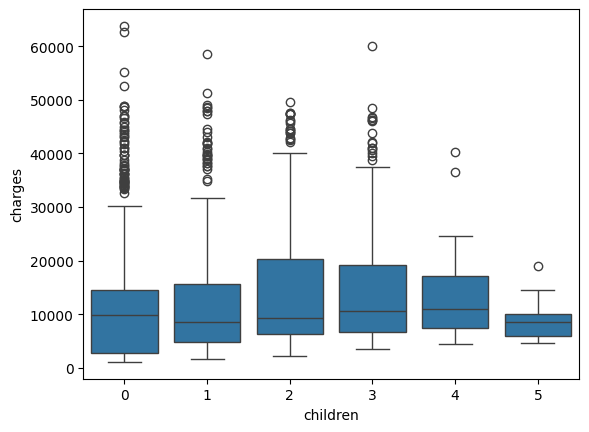

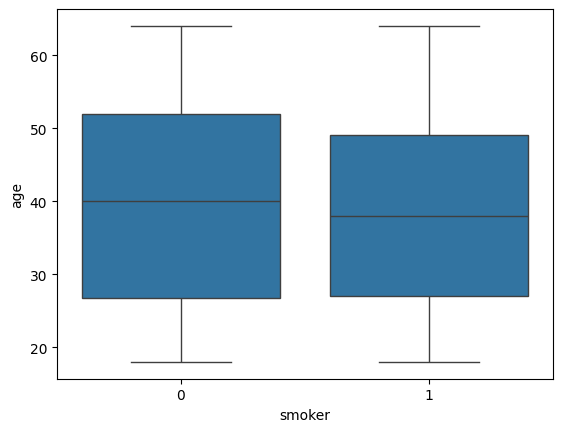

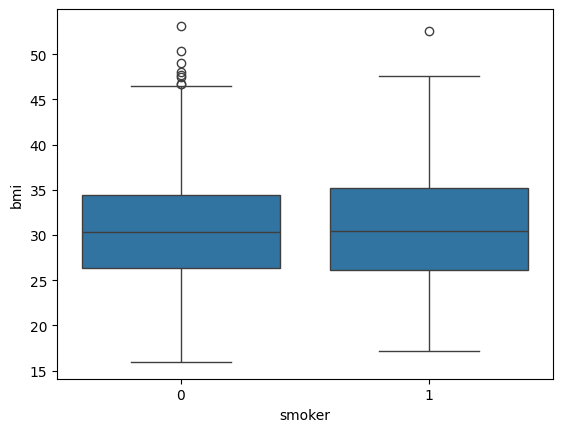

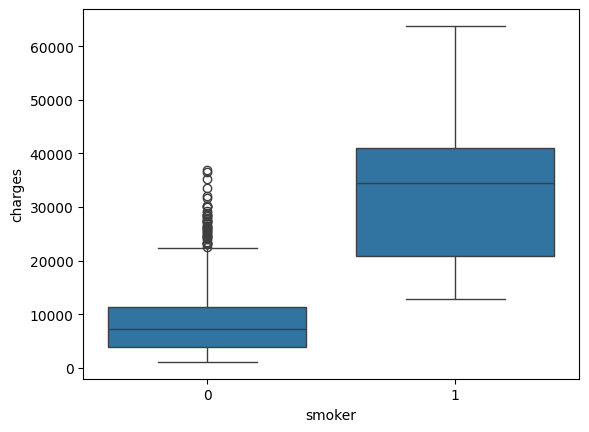

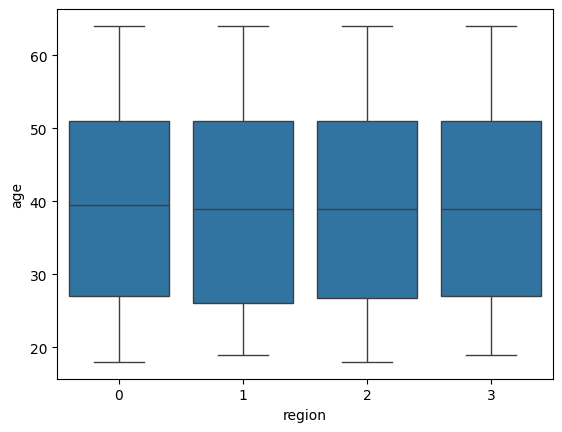

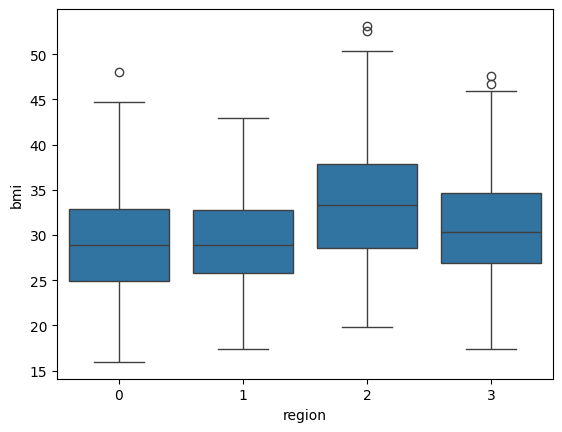

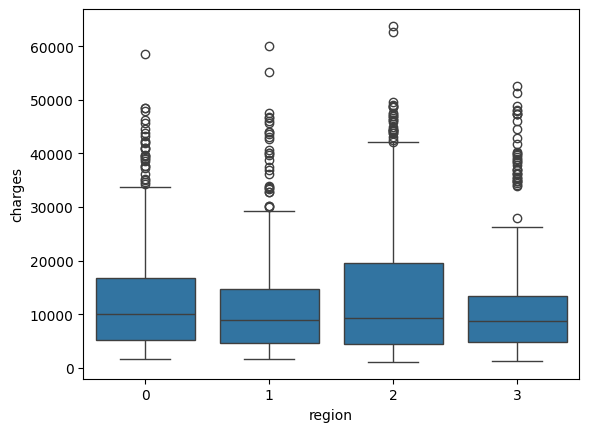

In [ ]:
continuous = ['age', 'bmi', 'charges']
discrete = ['sex','children', 'smoker', 'region']

for i in discrete:
  for j in continuous:
    sns.boxplot(x=i, y=j, data=df2)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

Bivariate Analysis - Discrete vs Discrete

In [ ]:
from itertools import combinations

columns = ['sex', 'children', 'smoker', 'region']

combinations_list = []
combinations_list.extend(combinations(columns, 2))

print(combinations_list)

[('sex', 'children'), ('sex', 'smoker'), ('sex', 'region'), ('children', 'smoker'), ('children', 'region'), ('smoker', 'region')]


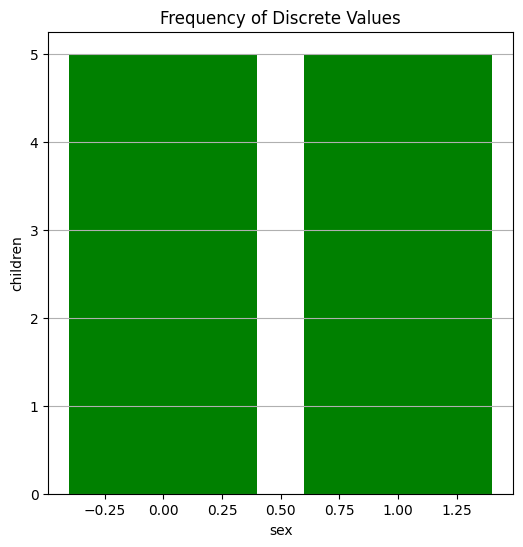

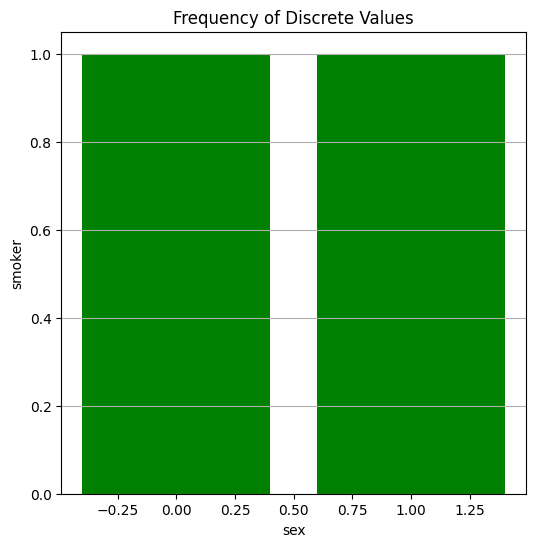

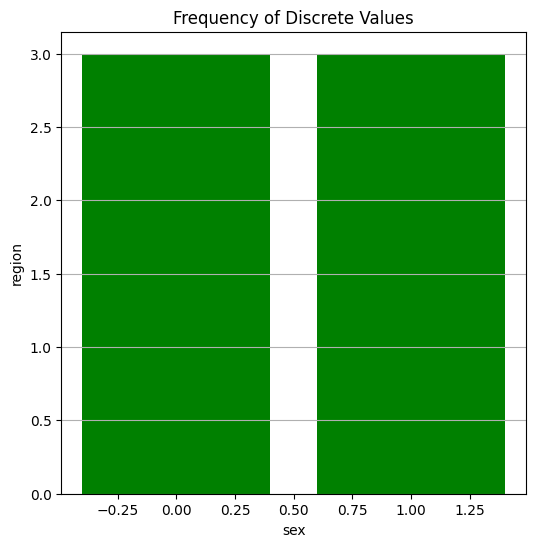

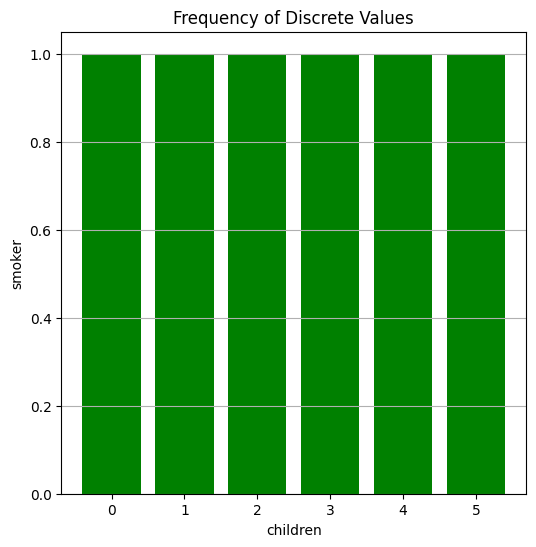

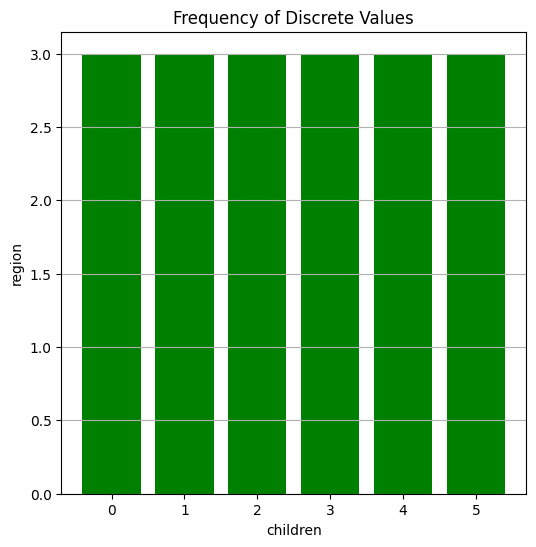

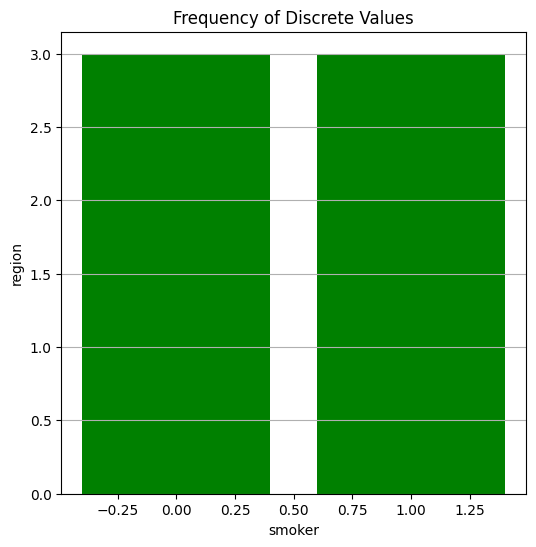

In [ ]:
for i in combinations_list:
  plt.figure(figsize=(6, 6))
  plt.bar(df2[i[0]], df2[i[1]], color='green')
  plt.xlabel(i[0])
  plt.ylabel(i[1])
  plt.title("Frequency of Discrete Values")
  plt.xticks(rotation=0)
  plt.grid(axis='y')
  plt.show()

## Correlations

In [ ]:
df2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


It is extremely evident that smoker and charges have a direct positive co-relation between them, if a person is a smoker then his insurance charges will be higher.

Same seems to be the case with age and bmi, with age and bmi the insurance charges increase.

There seems to be hardly any co-relation between sex, children and region to charges.

## Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif

,Features,VIF
0,age,9.247094
1,sex,2.007028
2,bmi,10.465005
3,children,1.805834
4,smoker,4.008939
5,region,2.951032
6,charges,7.922113


VIF values also don't seem be extremely large, though values between 5-10 also indicate that there is multi-collinearity.

Hence to tackle this multicollinearity we can use regularization techniques like ridge and lasso while training the model.

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop('charges', axis=1)
y = df2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [ ]:
X_train.shape

(1070, 6)

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
X_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1
...,...,...,...,...,...,...
109,63,1,35.090,0,1,2
575,58,0,27.170,0,0,1
535,38,1,28.025,1,0,0
543,54,0,47.410,0,1,2


In [ ]:
X_test.shape

(268, 6)

In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 4186.508898366436
Mean Squared Error: 33635210.43117845
Root Mean Squared Error: 5799.5870914383595
R-squared: 0.7833463107364536


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_poly_pred = poly_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2728.5205893619404
Mean Squared Error: 20529336.521275412
Root Mean Squared Error: 4530.931087676728
R-squared: 0.7833463107364536


SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4299.121820240543
Mean Squared Error: 34647269.281044394
Root Mean Squared Error: 5886.193105993414
R-squared: 0.7768273598880882


SGD on Polynomials

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, penalty='l1', eta0=0.01)
sgd_reg.fit(X_poly_train, y_train)

y_pred = sgd_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2929.273129310234
Mean Squared Error: 21049953.11230188
Root Mean Squared Error: 4588.022788991123
R-squared: 0.8644114324797733


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4187.971685427724
Mean Squared Error: 33641818.58882587
Root Mean Squared Error: 5800.156772780014
R-squared: 0.7833037457661384


 Ridge on Poly

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly_train, y_train)

y_pred = ridge_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2731.7033068255914
Mean Squared Error: 20530724.904333945
Root Mean Squared Error: 4531.084296758773
R-squared: 0.8677559249144535


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4186.509994456113
Mean Squared Error: 33635236.651939005
Root Mean Squared Error: 5799.589352009244
R-squared: 0.7833461418412857


Lasso on Poly

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_poly_train, y_train)

y_pred = lasso_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2730.162786462551
Mean Squared Error: 20529112.036849126
Root Mean Squared Error: 4530.906315170192
R-squared: 0.8677663138398206


Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4274.611337204734
Mean Squared Error: 34238439.61428728
Root Mean Squared Error: 5851.362201597785
R-squared: 0.7794607447977664


Elastic Net on Poly

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly_train, y_train)

y_pred = elastic_net.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2811.331470860113
Mean Squared Error: 20647444.96690934
Root Mean Squared Error: 4543.945968748896
R-squared: 0.8670040987226783


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 4, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2697.765430538481
Mean Squared Error: 21093484.004597444
Root Mean Squared Error: 4592.764309715603
R-squared: 0.8641310379678357


Decision Tree Regressor on Poly

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 4,
                                 random_state=42,
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 max_features = 25)
tree_reg.fit(X_poly_train, y_train)

y_pred = tree_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2687.314071732607
Mean Squared Error: 21186228.37314733
Root Mean Squared Error: 4602.850027227406
R-squared: 0.8635336458496605


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2465.9472780176197
Mean Squared Error: 20678427.93875564
Root Mean Squared Error: 4547.353949139613
R-squared: 0.8668045288353845


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 0.1, random_state=42)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2440.4838180497923
Mean Squared Error: 18810007.148137078
Root Mean Squared Error: 4337.050512518511
R-squared: 0.8788395436961506


XGBoost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators = 200, eta=0.38, max_depth = 8, random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2526.798455537441
Mean Squared Error: 22357577.662808284
Root Mean Squared Error: 4728.380025210356
R-squared: 0.8559886612407329


## Conclusion

The best in our case is the Gradient Boosting Regressor with an MAE of 2440.